# Performing Data Analysis

### Importing Libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
pd.pandas.set_option('display.max_columns',None)

In [3]:
#Loading data 
dataset = pd.read_csv('train.csv')

# Printing shape of the dataset
dataset.shape  # Dataset has 1460 rows and 81 columns

(1460, 81)

In [3]:
#Printing top 5 records
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Investigating nan values in dataset
features_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]
for feature in features_with_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
Electrical 0.0007 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


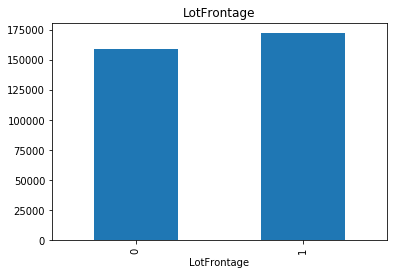

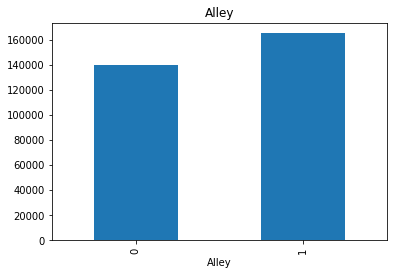

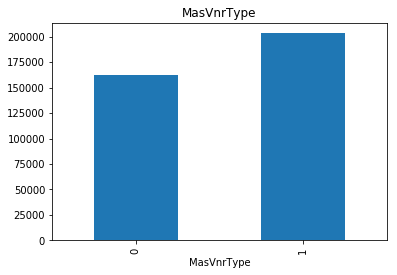

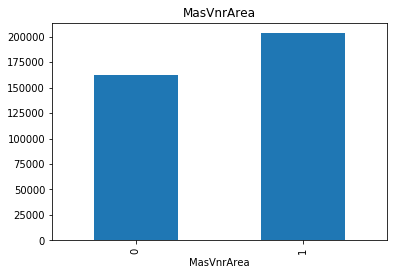

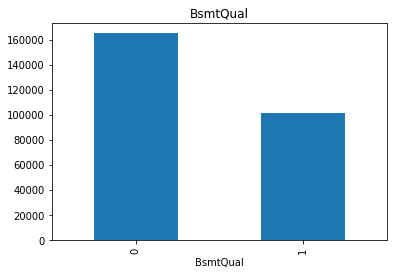

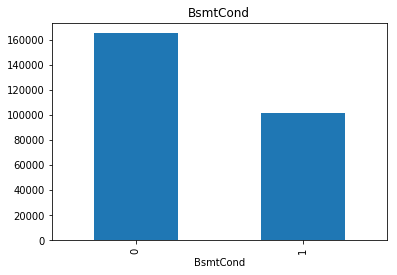

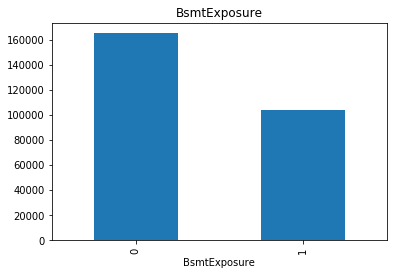

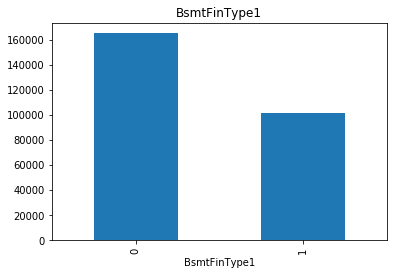

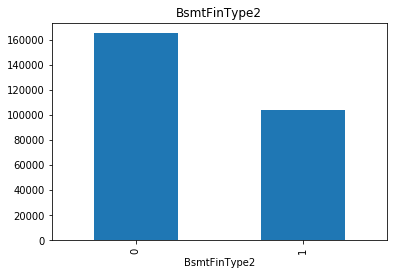

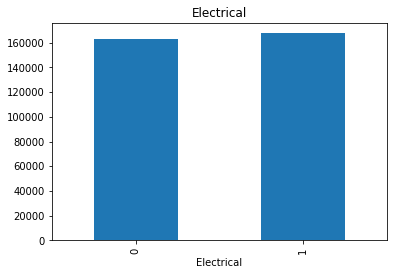

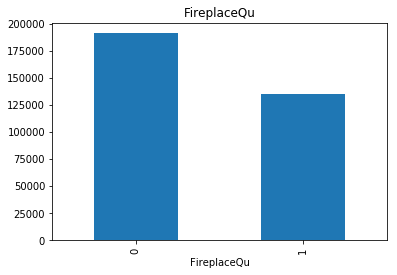

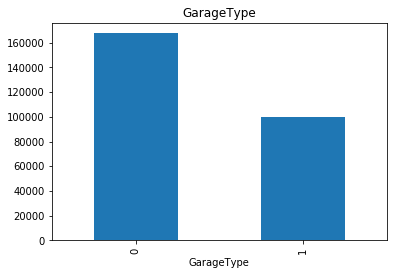

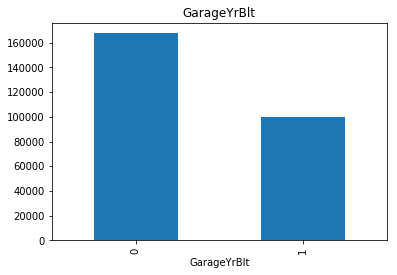

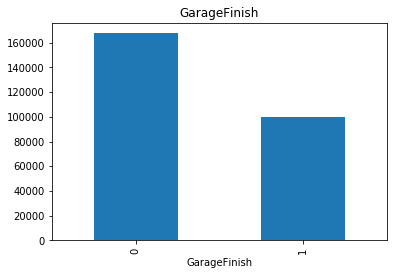

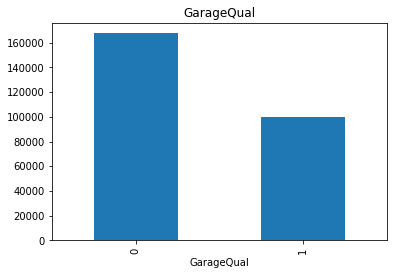

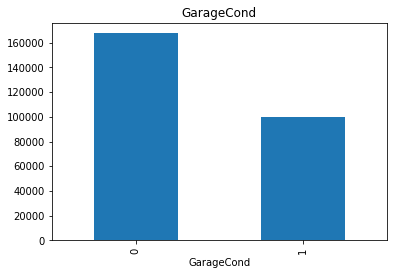

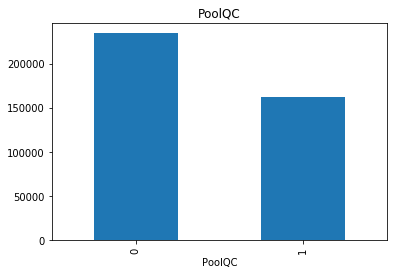

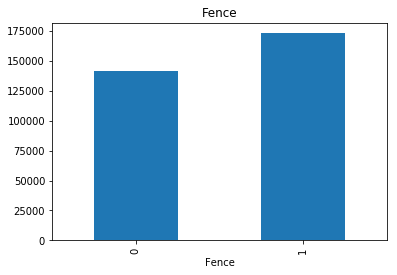

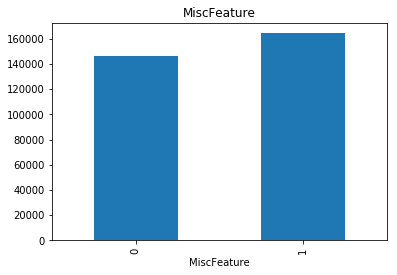

In [5]:
# Understanding relationship between missing and target value
for feature in features_with_nan:
    data = dataset.copy()
    data[feature] = np.where(data[feature].isnull(), 1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Since, these independent variables have a relationship with the target variable which can be verified with above chart therefore, it is essential to consider them in prediction

In [5]:
#Numerical variables in dataset

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes!='O' ]
print('Total number of features: {}'.format(len(numerical_features)))
dataset[numerical_features].head()

Total number of features: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# Temporal variables (DateTime)
#We have 4 years variables. We can extract some useful info. such as no. of years from this data.
year_feature = [feature for feature in numerical_features if 'Year' in feature or  'Yr' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [7]:
for feature in year_feature:
    print(feature,dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

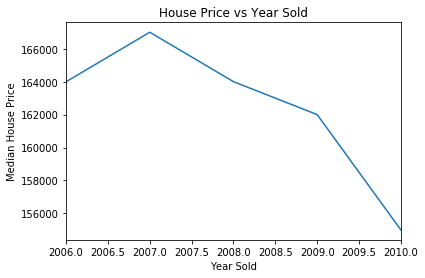

In [8]:
#Analysing Temporal variable
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

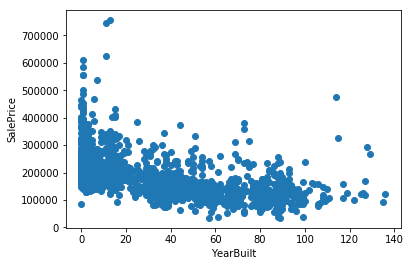

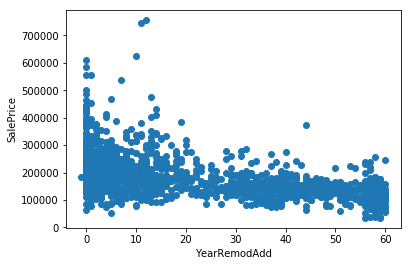

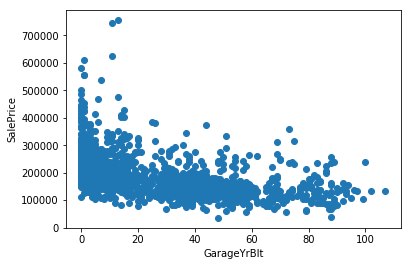

In [9]:
#Comparing difference between all years features with salesprice
for feature in year_feature:
    if feature!='YrSold':
        data = dataset.copy()
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [10]:
#Discrete variables in numerical features
discrete_feature = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print('Number of discrete variables {}'.format(len(discrete_feature)))

Number of discrete variables 17


In [11]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


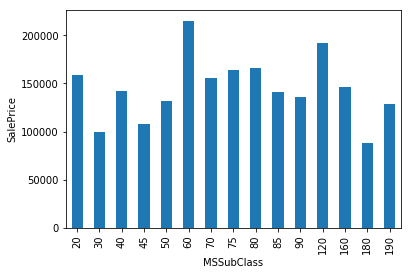

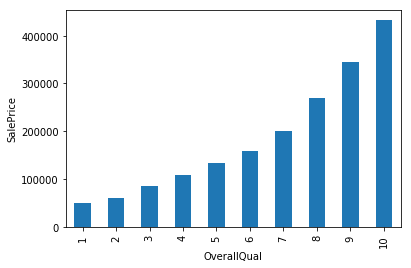

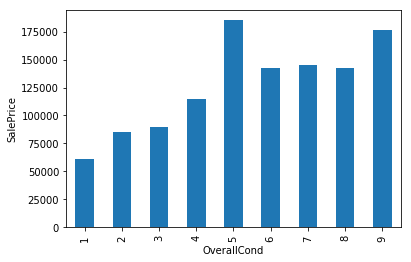

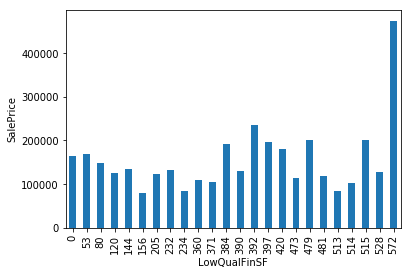

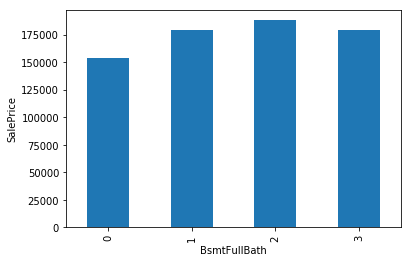

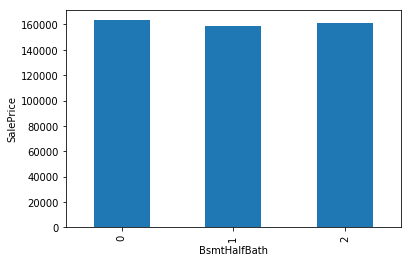

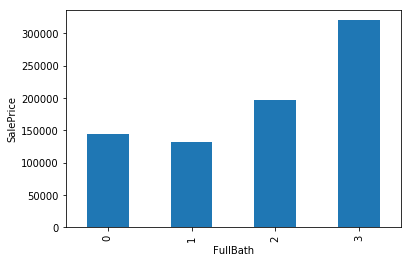

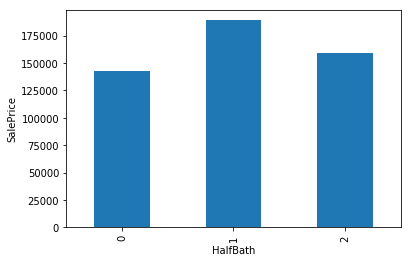

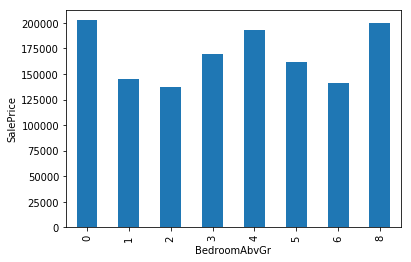

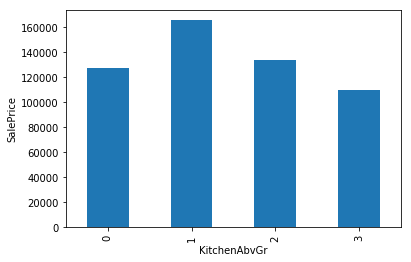

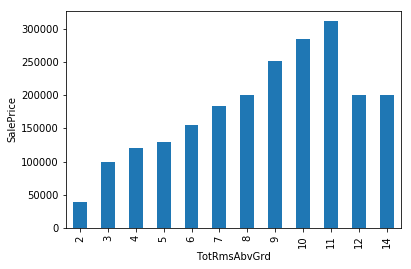

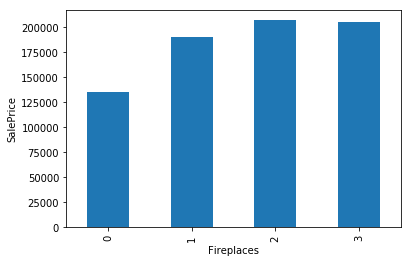

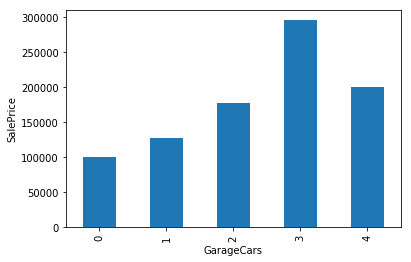

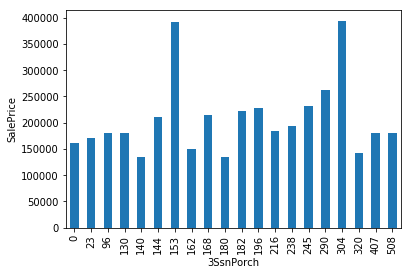

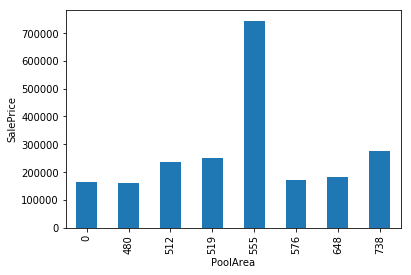

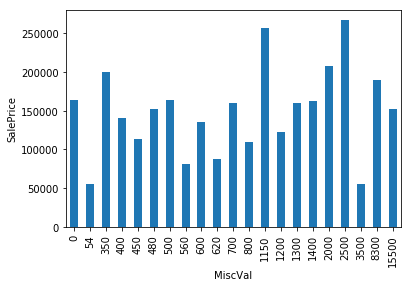

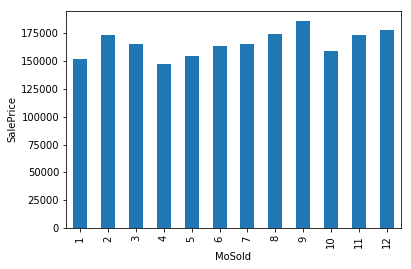

In [12]:
#Relationship between discrete and Salesprice
for feature in discrete_feature:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [13]:
#Continuous Distribution
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
len(continuous_features)

16

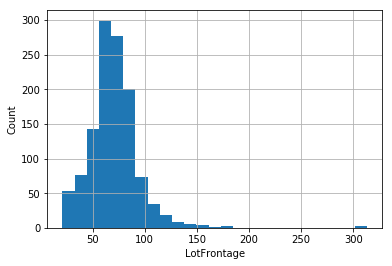

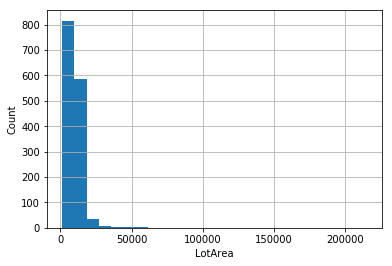

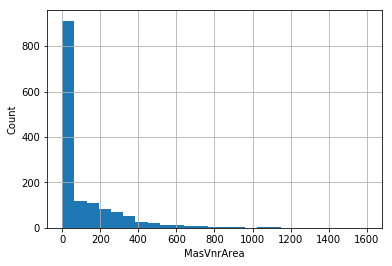

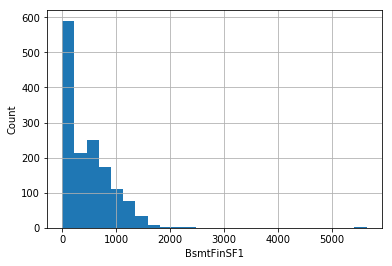

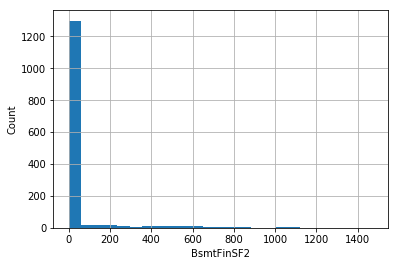

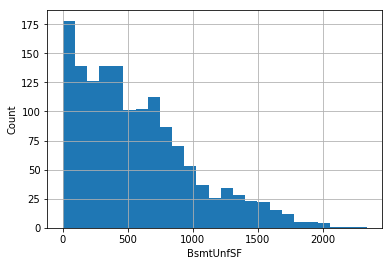

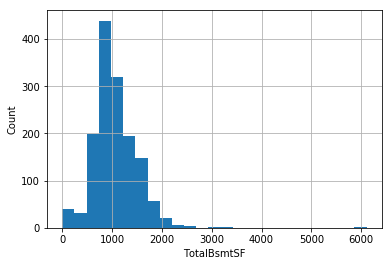

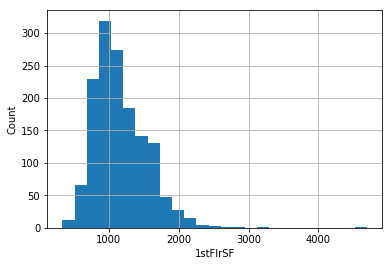

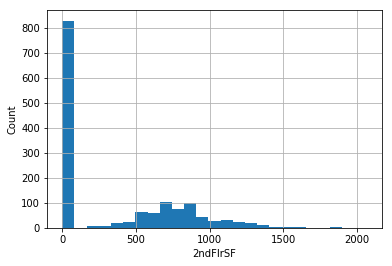

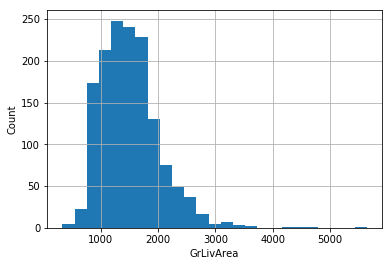

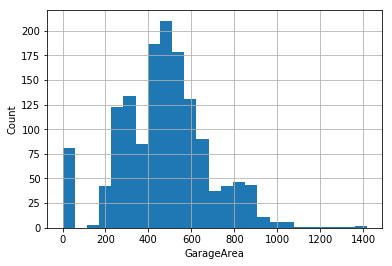

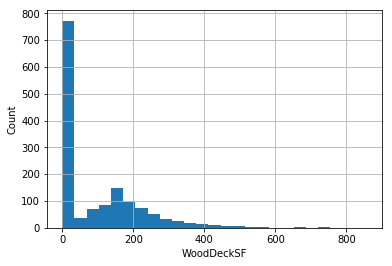

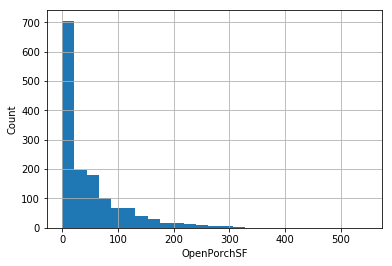

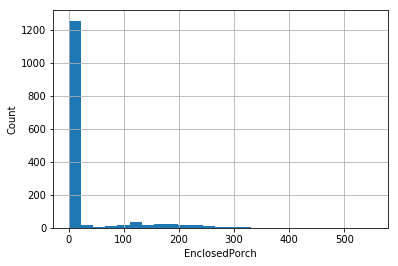

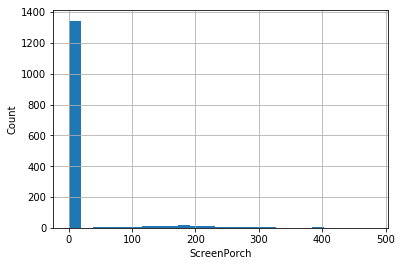

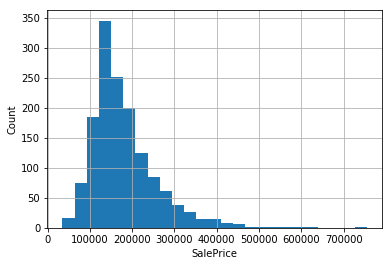

In [14]:
#Exploring relationship between continuous and SalePrice. 
#Note: We use histogram to visualise numerical continuous dataset
for feature in continuous_features:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

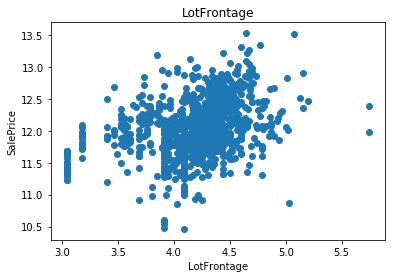

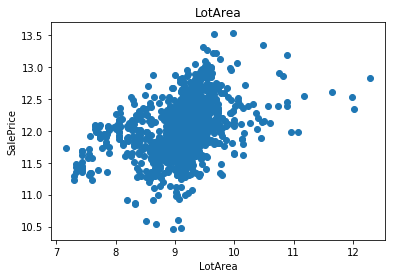

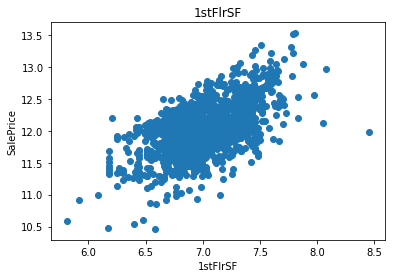

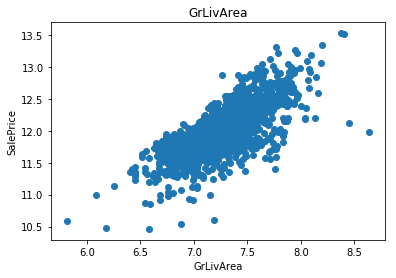

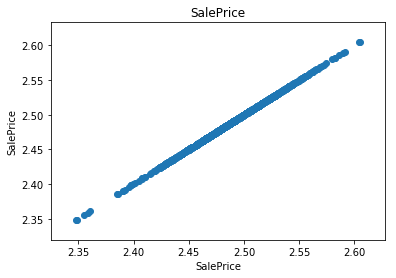

In [15]:
#We  will apply log normal distribution

for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

# Outliers

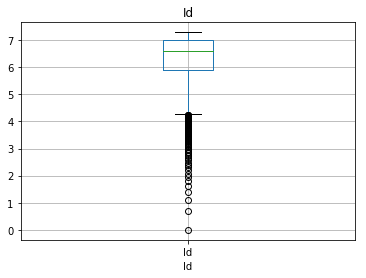

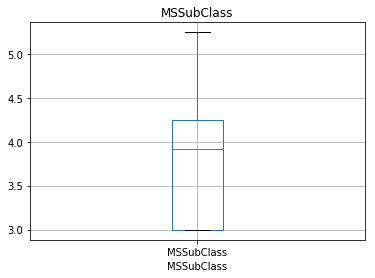

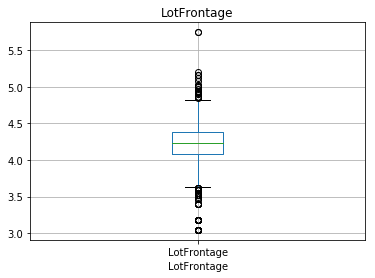

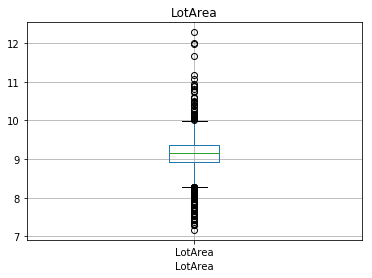

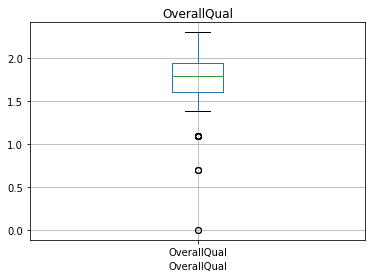

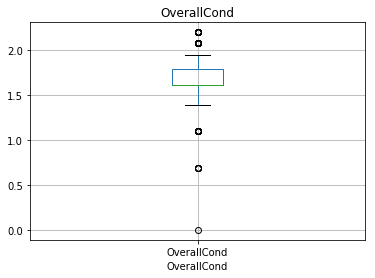

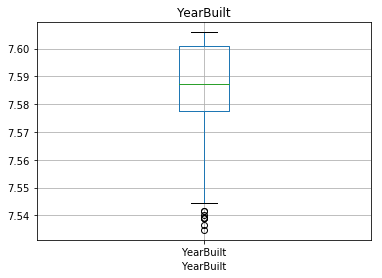

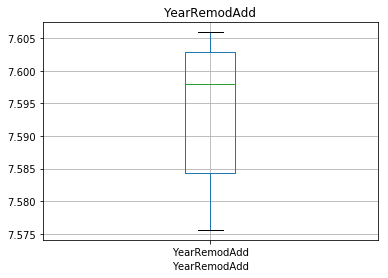

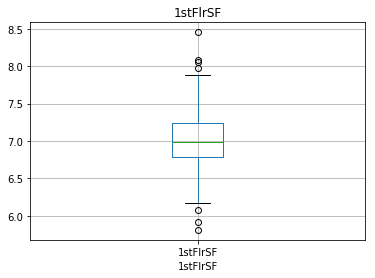

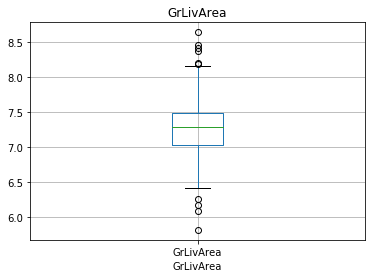

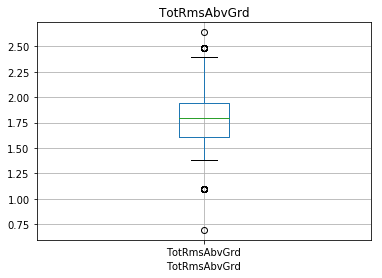

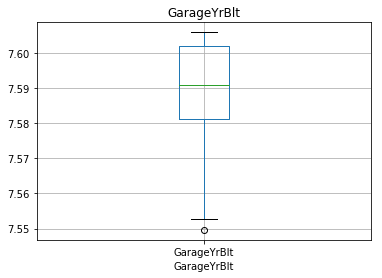

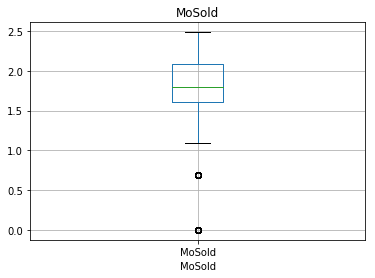

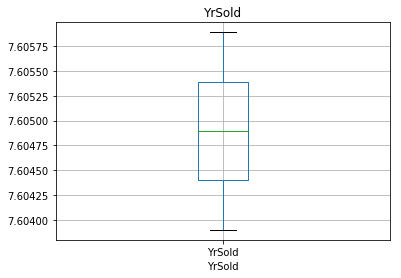

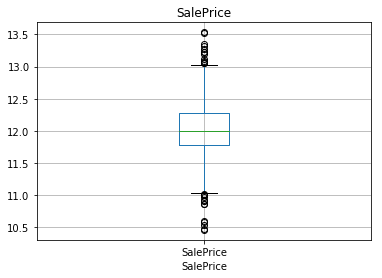

In [16]:
for feature in numerical_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.title(feature)
        plt.show()

In [17]:
#Categorical features
categorical_features = [feature for feature in dataset.columns if feature not in numerical_features]
len(categorical_features)

43

In [18]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
# Finding out the cardinality i.e. no. of categories in feature
for feature in categorical_features:
    print('The feature is {} and number of categories is {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories is 5
The feature is Street and number of categories is 2
The feature is Alley and number of categories is 3
The feature is LotShape and number of categories is 4
The feature is LandContour and number of categories is 4
The feature is Utilities and number of categories is 2
The feature is LotConfig and number of categories is 5
The feature is LandSlope and number of categories is 3
The feature is Neighborhood and number of categories is 25
The feature is Condition1 and number of categories is 9
The feature is Condition2 and number of categories is 8
The feature is BldgType and number of categories is 5
The feature is HouseStyle and number of categories is 8
The feature is RoofStyle and number of categories is 6
The feature is RoofMatl and number of categories is 8
The feature is Exterior1st and number of categories is 15
The feature is Exterior2nd and number of categories is 16
The feature is MasVnrType and number of categories is 5
The f

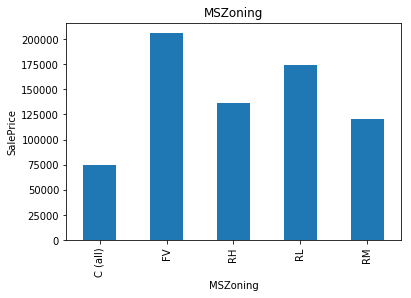

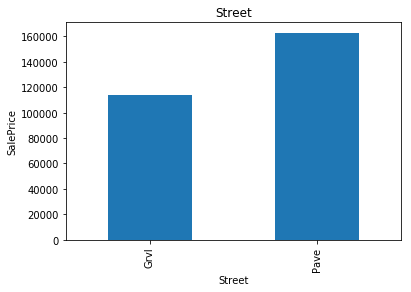

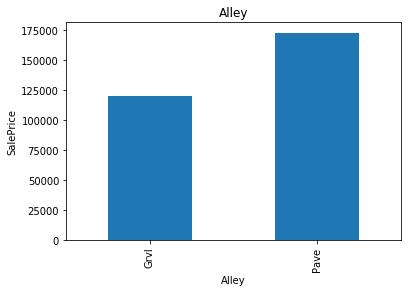

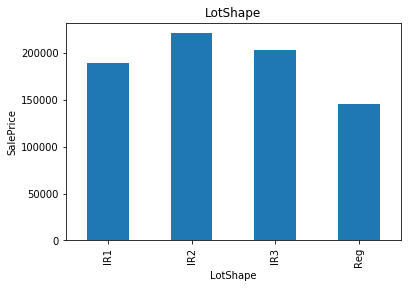

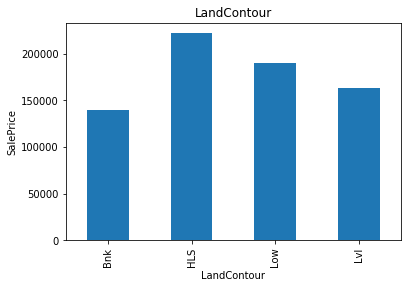

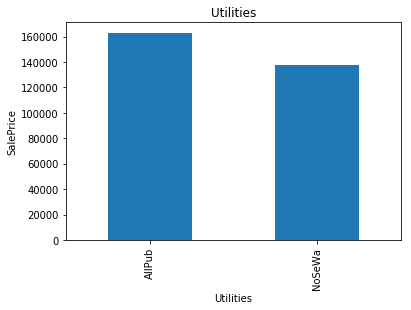

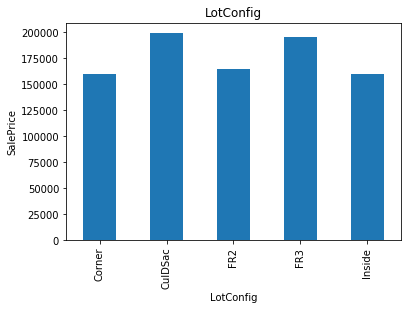

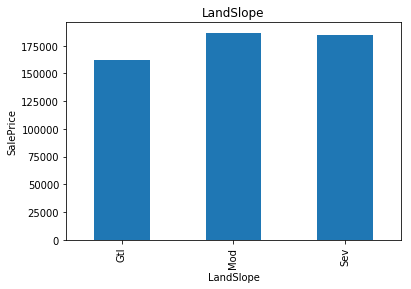

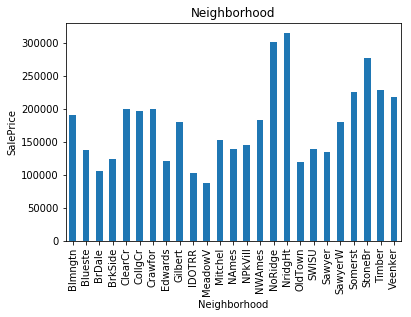

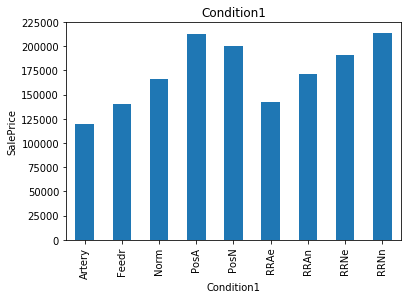

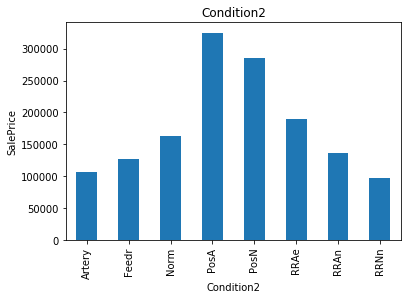

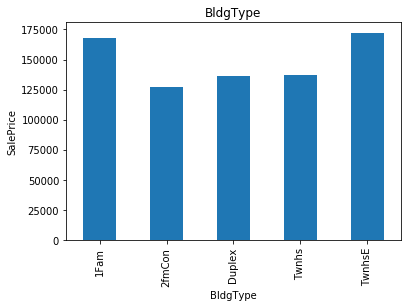

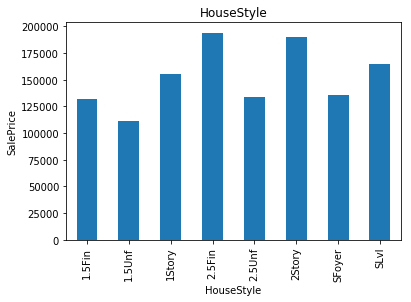

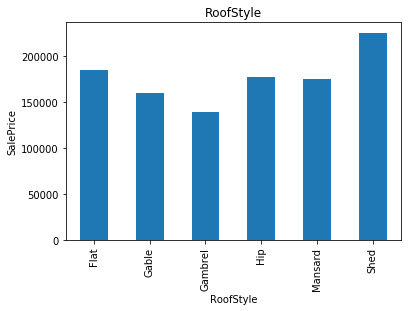

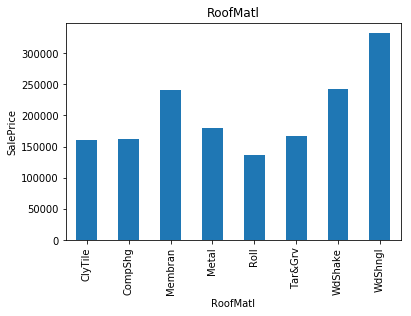

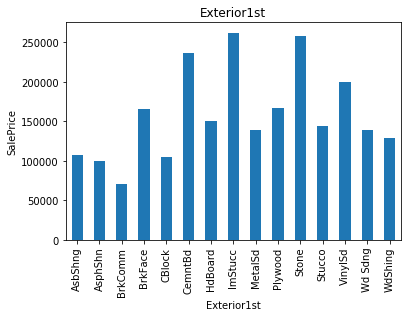

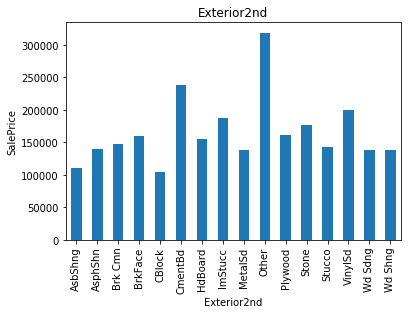

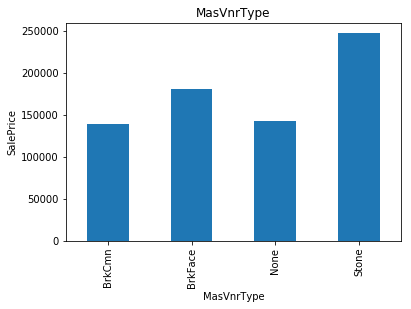

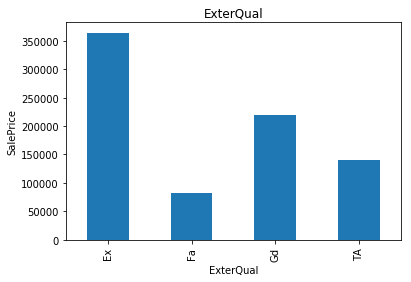

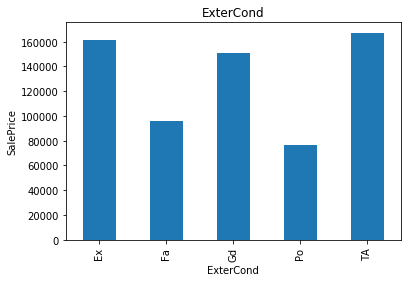

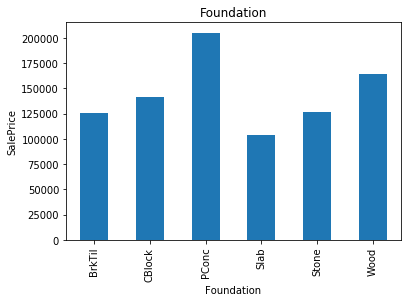

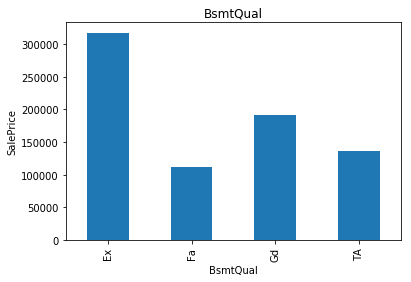

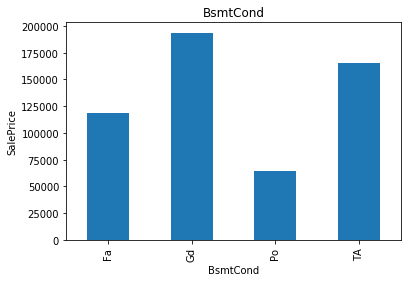

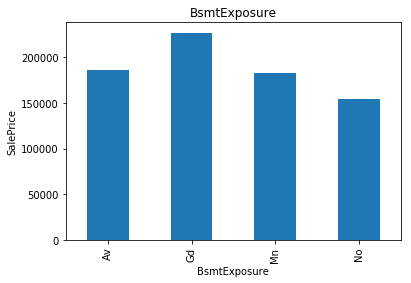

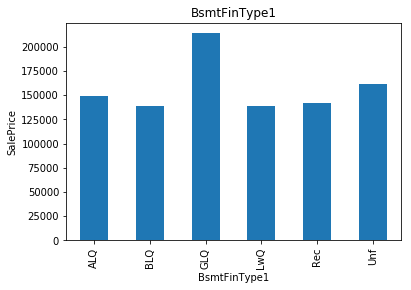

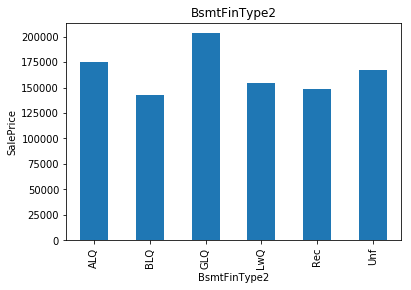

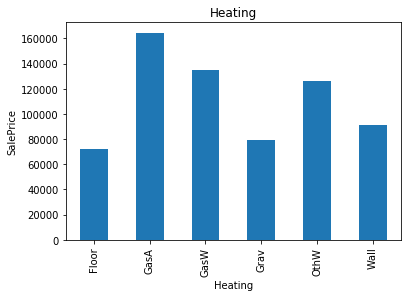

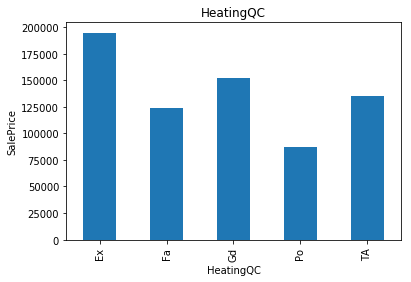

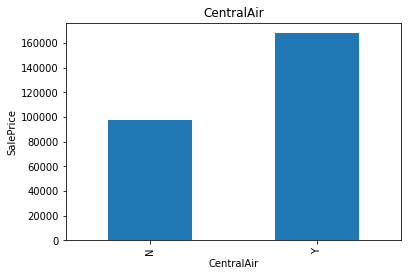

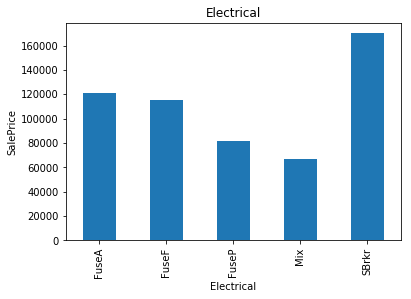

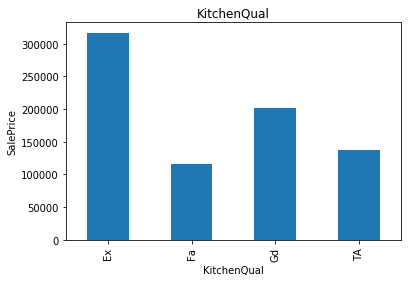

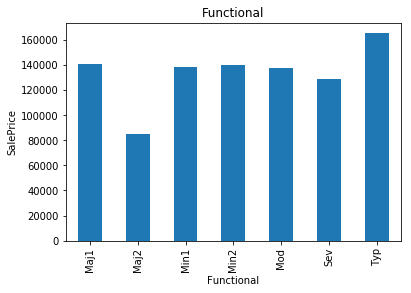

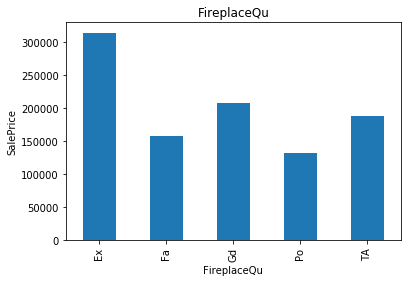

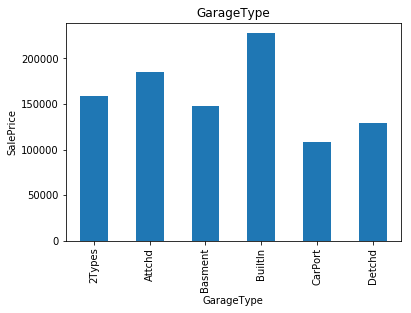

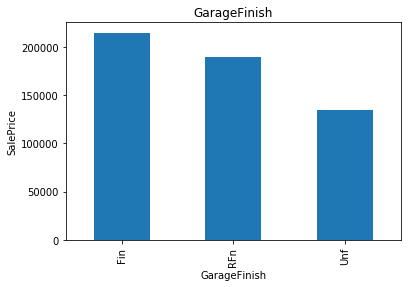

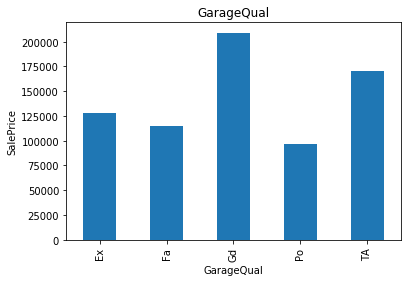

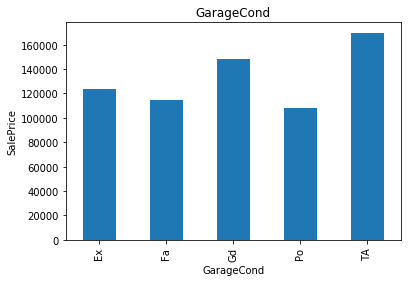

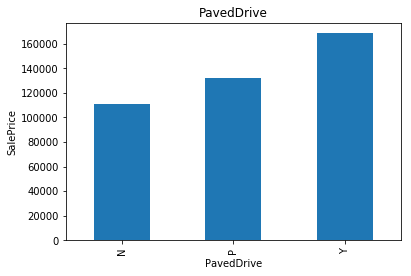

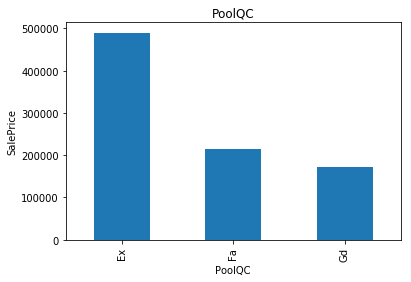

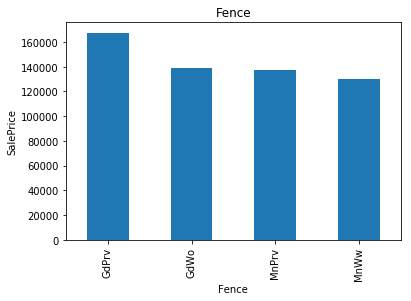

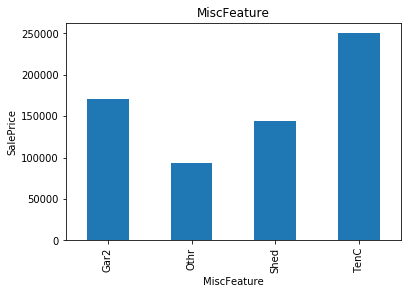

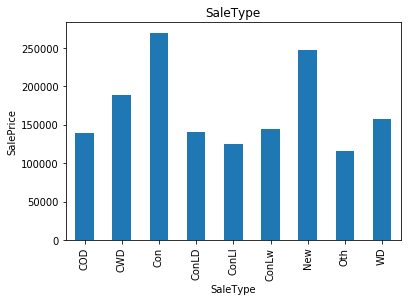

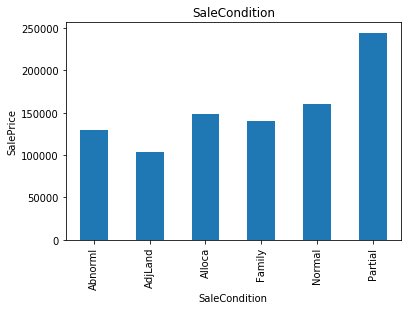

In [19]:
#Relationship between categories and dependednt variables
for feature in categorical_features:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering 

In [20]:
#Handle Missing values for Training data
#Listing null values in categorical data
features_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']
for feature in features_with_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'%missing values')

Alley 0.9377 %missing values
MasVnrType 0.0055 %missing values
BsmtQual 0.0253 %missing values
BsmtCond 0.0253 %missing values
BsmtExposure 0.026 %missing values
BsmtFinType1 0.0253 %missing values
BsmtFinType2 0.026 %missing values
FireplaceQu 0.4726 %missing values
GarageType 0.0555 %missing values
GarageFinish 0.0555 %missing values
GarageQual 0.0555 %missing values
GarageCond 0.0555 %missing values
PoolQC 0.9952 %missing values
Fence 0.8075 %missing values
MiscFeature 0.963 %missing values


In [21]:
#Replace missing values with new labels
def replace_cat_feature(dataset,features_with_nan):
    data = dataset.copy()
    data[features_with_nan] = data[features_with_nan].fillna("Missing")
    return data
dataset = replace_cat_feature(dataset,features_with_nan)
dataset[features_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [23]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [22]:
# Handling numerical features with nan
numerical_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
for feature in numerical_with_nan:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'%missing values')


LotFrontage 0.1774 %missing values
MasVnrArea 0.0055 %missing values
GarageYrBlt 0.0555 %missing values


In [23]:
for feature in numerical_with_nan:
    # We will fill missing values with median in case of outliers
    median_value = dataset[feature].median()
    #create a new variable to capture nan data
    dataset[feature+'nan'] = np.where(dataset[feature].isnull(),1,0)
    dataset[feature] = dataset[feature].fillna(median_value)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [26]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [24]:
#Handling temporal variables
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset[feature] = dataset['YrSold']-dataset[feature]

In [28]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [25]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [26]:
#Handling Skewed numerical features
num_features = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']
for feature in num_features:
    dataset[feature] = np.log(dataset[feature])

In [31]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [27]:
#Handle categorical data having frequency less than 1%
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [33]:
dataset.groupby('Alley')['SalePrice'].count()/len(dataset)

Alley
Grvl       0.034247
Missing    0.937671
Pave       0.028082
Name: SalePrice, dtype: float64

In [28]:
for feature in categorical_features:
    temp = dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df = temp[temp>0.01].index
    dataset[feature] = np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [29]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [60]:
 dataset.groupby(['Alley'])['SalePrice'].mean().sort_values().index

Index(['Grvl', 'Pave', 'Missing'], dtype='object', name='Alley')

In [30]:
for feature in categorical_features:
    labels_ordered = dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [36]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


# Feature Scaling

In [31]:
from sklearn.preprocessing import PowerTransformer
feature_scale = [feature for feature in dataset.columns if feature not in ['Id','SalePrice']]
pt = PowerTransformer(method='yeo-johnson')
pt.fit(dataset[feature_scale])

c:\users\cooldude\venv\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\users\cooldude\venv\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [32]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(pt.transform(dataset[feature_scale]),columns=feature_scale)],axis=1)

In [39]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.493460,0.234737,-0.153135,-0.146232,0.064238,0.257821,-0.758498,-0.027649,0.02618,-0.621329,-0.237571,0.604244,0.058253,0.101885,-0.014947,1.285913,0.667499,-0.477387,-1.099088,-0.752653,-0.528676,-0.134652,1.101725,1.098106,0.777642,1.230708,1.091985,0.372618,1.061173,0.601653,-0.003230,-0.503027,1.145634,0.797537,0.284514,-0.359384,-0.887576,-0.404029,0.149696,0.927470,0.263813,0.307332,-0.799369,1.170239,-0.134652,0.528138,1.175573,-0.243940,0.797246,1.284128,0.170752,-0.172658,0.768576,0.946380,0.271154,-1.027341,-0.937171,0.561292,-1.032711,0.362171,0.273835,0.383899,0.162493,0.317831,0.299252,-0.950337,0.841820,-0.407595,-0.129279,-0.293785,-0.069409,-0.069409,0.485815,0.195977,-0.192177,-1.694229,0.140053,-0.106558,0.011502,-0.464385,-0.074227,-0.24236
1,2,12.109011,-1.164269,0.234737,0.547287,0.100886,0.064238,0.257821,-0.758498,-0.027649,0.02618,1.724502,-0.237571,0.133308,-1.569879,0.101885,-0.014947,-0.318408,-0.042192,2.011352,0.119351,0.645629,-0.528676,-0.134652,-0.868079,-0.905414,-0.640580,-0.818452,-0.651698,0.372618,-0.650645,0.601653,-0.003230,1.763603,-0.327768,1.011471,0.284514,-0.359384,-0.434388,0.508177,0.149696,0.927470,0.263813,0.307332,0.428678,-0.871454,-0.134652,-0.383247,-0.838866,4.099375,0.797246,-0.773692,0.170752,-0.172658,-0.744423,-0.234627,0.271154,0.784005,0.655284,0.561292,0.336986,0.362171,0.273835,-0.004602,0.162493,0.317831,0.299252,1.213714,-1.071307,-0.407595,-0.129279,-0.293785,-0.069409,-0.069409,0.485815,0.195977,-0.192177,-0.444891,-0.613715,-0.106558,0.011502,-0.464385,-0.074227,-0.24236
2,3,12.317167,0.493460,0.234737,-0.006482,0.410244,0.064238,0.257821,1.272636,-0.027649,0.02618,-0.621329,-0.237571,0.604244,0.058253,0.101885,-0.014947,1.285913,0.667499,-0.477387,-0.942898,-0.649602,-0.528676,-0.134652,1.101725,1.098106,0.777642,1.193873,1.091985,0.372618,1.061173,0.601653,-0.003230,0.639589,1.145634,0.571325,0.284514,-0.359384,-0.048083,-0.253787,0.149696,0.927470,0.263813,0.307332,-0.568446,1.172896,-0.134652,0.658809,1.175573,-0.243940,0.797246,1.284128,0.170752,-0.172658,0.768576,-0.234627,0.271154,0.784005,0.655284,0.561292,-0.857635,0.362171,0.273835,0.641990,0.162493,0.317831,0.299252,-0.950337,0.668453,-0.407595,-0.129279,-0.293785,-0.069409,-0.069409,0.485815,0.195977,-0.192177,0.987490,0.140053,-0.106558,0.011502,-0.464385,-0.074227,-0.24236
3,4,11.849398,0.698191,0.234737,-0.405904,0.090742,0.064238,0.257821,1.272636,-0.027649,0.02618,1.507989,-0.237571,0.900163,0.058253,0.101885,-0.014947,1.285913,0.667499,-0.477387,1.426823,0.800808,-0.528676,-0.134652,-1.491836,-0.600624,-0.640580,-0.818452,-0.651698,0.372618,-1.503172,-0.709905,3.553095,-0.503027,-0.327768,0.142272,0.284514,-0.359384,0.183337,-0.644806,0.149696,-0.313464,0.263813,0.307332,-0.429443,1.146834,-0.134652,0.540411,1.175573,-0.243940,-1.025173,-0.773692,0.170752,-0.172658,0.768576,0.389921,0.271154,0.784005,1.188629,-1.178491,-0.779922,-0.776393,1.759713,0.786092,0.162493,0.317831,0.299252,-0.950337,0.584540,2.456640,-0.129279,-0.293785,-0.069409,-0.069409,0.485815,0.195977,-0.192177,-1.694229,-1.368874

In [40]:
data.to_csv('X_train.csv',index=False)

# Feature Selection 

In [33]:
dataset = pd.read_csv('X_train.csv')

In [34]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.493460,0.234737,-0.153135,-0.146232,0.064238,0.257821,-0.758498,-0.027649,0.02618,-0.621329,-0.237571,0.604244,0.058253,0.101885,-0.014947,1.285913,0.667499,-0.477387,-1.099088,-0.752653,-0.528676,-0.134652,1.101725,1.098106,0.777642,1.230708,1.091985,0.372618,1.061173,0.601653,-0.003230,-0.503027,1.145634,0.797537,0.284514,-0.359384,-0.887576,-0.404029,0.149696,0.927470,0.263813,0.307332,-0.799369,1.170239,-0.134652,0.528138,1.175573,-0.243940,0.797246,1.284128,0.170752,-0.172658,0.768576,0.946380,0.271154,-1.027341,-0.937171,0.561292,-1.032711,0.362171,0.273835,0.383899,0.162493,0.317831,0.299252,-0.950337,0.841820,-0.407595,-0.129279,-0.293785,-0.069409,-0.069409,0.485815,0.195977,-0.192177,-1.694229,0.140053,-0.106558,0.011502,-0.464385,-0.074227,-0.24236
1,2,12.109011,-1.164269,0.234737,0.547287,0.100886,0.064238,0.257821,-0.758498,-0.027649,0.02618,1.724502,-0.237571,0.133308,-1.569879,0.101885,-0.014947,-0.318408,-0.042192,2.011352,0.119351,0.645629,-0.528676,-0.134652,-0.868079,-0.905414,-0.640580,-0.818452,-0.651698,0.372618,-0.650645,0.601653,-0.003230,1.763603,-0.327768,1.011471,0.284514,-0.359384,-0.434388,0.508177,0.149696,0.927470,0.263813,0.307332,0.428678,-0.871454,-0.134652,-0.383247,-0.838866,4.099375,0.797246,-0.773692,0.170752,-0.172658,-0.744423,-0.234627,0.271154,0.784005,0.655284,0.561292,0.336986,0.362171,0.273835,-0.004602,0.162493,0.317831,0.299252,1.213714,-1.071307,-0.407595,-0.129279,-0.293785,-0.069409,-0.069409,0.485815,0.195977,-0.192177,-0.444891,-0.613715,-0.106558,0.011502,-0.464385,-0.074227,-0.24236
2,3,12.317167,0.493460,0.234737,-0.006482,0.410244,0.064238,0.257821,1.272636,-0.027649,0.02618,-0.621329,-0.237571,0.604244,0.058253,0.101885,-0.014947,1.285913,0.667499,-0.477387,-0.942898,-0.649602,-0.528676,-0.134652,1.101725,1.098106,0.777642,1.193873,1.091985,0.372618,1.061173,0.601653,-0.003230,0.639589,1.145634,0.571325,0.284514,-0.359384,-0.048083,-0.253787,0.149696,0.927470,0.263813,0.307332,-0.568446,1.172896,-0.134652,0.658809,1.175573,-0.243940,0.797246,1.284128,0.170752,-0.172658,0.768576,-0.234627,0.271154,0.784005,0.655284,0.561292,-0.857635,0.362171,0.273835,0.641990,0.162493,0.317831,0.299252,-0.950337,0.668453,-0.407595,-0.129279,-0.293785,-0.069409,-0.069409,0.485815,0.195977,-0.192177,0.987490,0.140053,-0.106558,0.011502,-0.464385,-0.074227,-0.24236
3,4,11.849398,0.698191,0.234737,-0.405904,0.090742,0.064238,0.257821,1.272636,-0.027649,0.02618,1.507989,-0.237571,0.900163,0.058253,0.101885,-0.014947,1.285913,0.667499,-0.477387,1.426823,0.800808,-0.528676,-0.134652,-1.491836,-0.600624,-0.640580,-0.818452,-0.651698,0.372618,-1.503172,-0.709905,3.553095,-0.503027,-0.327768,0.142272,0.284514,-0.359384,0.183337,-0.644806,0.149696,-0.313464,0.263813,0.307332,-0.429443,1.146834,-0.134652,0.540411,1.175573,-0.243940,-1.025173,-0.773692,0.170752,-0.172658,0.768576,0.389921,0.271154,0.784005,1.188629,-1.178491,-0.779922,-0.776393,1.759713,0.786092,0.162493,0.317831,0.299252,-0.950337,0.584540,2.456640,-0.129279,-0.293785,-0.069409,-0.069409,0.485815,0.195977,-0.192177,-1.694229,-1.368874

In [35]:
y_train = dataset[['SalePrice']]
X_train = dataset.drop(['Id','SalePrice'],axis=1)

In [36]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero 0.007

feature_set_model = SelectFromModel(Lasso(alpha=0.009,random_state=0))
feature_set_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.009, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [37]:
feature_set_model.get_support() #True signifies that the particular feature is important

array([False,  True, False,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False,  True,  True, False,  True, False,  True, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [38]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_set_model.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_set_model.estimator_.coef_ == 0)))

total features: 82
selected features: 35
features with coefficients shrank to zero: 47


In [39]:
selected_feat

Index(['MSZoning', 'LotArea', 'LandContour', 'Neighborhood', 'Condition1',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch',
       'SaleCondition'],
      dtype='object')

In [40]:
X_train = X_train[selected_feat]
X_train.head()

,MSZoning,LotArea,LandContour,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,HalfBath,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,ScreenPorch,SaleCondition
0,0.234737,-0.146232,-0.027649,0.604244,0.058253,0.667499,-0.477387,-1.099088,-0.752653,1.101725,1.091985,1.061173,0.601653,-0.503027,0.797537,-0.404029,0.927470,0.263813,-0.799369,0.528138,1.175573,1.284128,-0.172658,0.768576,0.271154,-1.027341,-0.937171,0.561292,0.362171,0.273835,0.162493,0.299252,-0.950337,-0.293785,0.011502
1,0.234737,0.100886,-0.027649,0.133308,-1.569879,-0.042192,2.011352,0.119351,0.645629,-0.868079,-0.651698,-0.650645,0.601653,1.763603,1.011471,0.508177,0.927470,0.263813,0.428678,-0.383247,-0.838866,-0.773692,-0.172658,-0.744423,0.271154,0.784005,0.655284,0.561292,0.362171,0.273835,0.162493,0.299252,1.213714,-0.293785,0.011502
2,0.234737,0.410244,-0.027649,0.604244,0.058253,0.667499,-0.477387,-0.942898,-0.649602,1.101725,1.091985,1.061173,0.601653,0.639589,0.571325,-0.253787,0.927470,0.263813,-0.568446,0.658809,1.175573,1.284128,-0.172658,0.768576,0.271154,0.784005,0.655284,0.561292,0.362171,0.273835,0.162493,0.299252,-0.950337,-0.293785,0.011502
3,0.234737,0.090742,-0.027649,0.900163,0.058253,0.667499,-0.477387,1.426823,0.800808,-1.491836,-0.651698,-1.503172,-0.709905,-0.503027,0.142272,-0.644806,-0.313464,0.263813,-0.429443,0.540411,1.175573,-0.773692,-0.172658,0.768576,0.271154,0.784005,1.188629,-1.178491,-0.776393,1.759713,0.162493,0.299252,-0.950337,-0.293785,-2.476033
4,0.234737,0.877165,-0.027649,1.723441,0.058253,1.350924,-0.477387,-0.873619,-0.471720,1.101725,1.091985,1.061173,0.601653,1.310640,0.750541,0.254387,0.927470,0.263813,0.124332,1.283277,1.175573,1.284128,-0.172658,0.768576,0.271154,0.784005,0.655284,0.561292,0.362171,1.759713,0.162493,0.299252,1.079695,-0.293785,0.011502


In [41]:
# Splitting into training and validation 
x_train,x_valid,Y_train,Y_valid=train_test_split(X_train,y_train,test_size=0.3,random_state=0)

## Models

### 1. Linear Regression

In [42]:
#Model 1
model_1 = LinearRegression()
model_1.fit(x_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
pred = model_1.predict(x_valid)
model1_score = r2_score(pred,Y_valid)
model1_score

0.8819871354135776

### 2. SVM

In [199]:
#Model 2
model_2 = SVR()
model_2.fit(x_train,Y_train)

c:\users\cooldude\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [200]:
pred = model_2.predict(x_valid)
model2_score = r2_score(pred,Y_valid)
model2_score

0.8679662372191039

### 3. Ridge

In [203]:
#Model_3
model_3 = Ridge(random_state=1)
model_3.fit(x_train,Y_train)
pred = model_3.predict(x_valid)
model3_score = r2_score(pred,Y_valid)

In [204]:
model3_score

0.88199771844171

### 4. Decision Tree

In [205]:
# Model_4
model_4 = DecisionTreeRegressor()
model_4.fit(x_train,Y_train)
pred = model_4.predict(x_valid)
model4_score = r2_score(pred,Y_valid)

In [206]:
model4_score

0.7507981773062854

### 5. Random Forest

In [207]:
# Model_5
model_5 = RandomForestRegressor(random_state=0)
model_5.fit(x_train,Y_train)
pred = model_5.predict(x_valid)
model5_score = r2_score(pred,Y_valid)
model5_score

c:\users\cooldude\venv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8903768495421633

##### Among various implemented models, it is observed that Random Forest gives best results with R2 Score of 89.03. Further, performing hyper-parameter tuning to see if the results improve.

## Performing Hyper-Parameter Tuning for various Models

In [44]:
#Performing Hyper-parameter tuning for SVM
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': range(0,100,5), 'gamma': [1,0.1,0.01,0.001,0.0001,0.00001,1e-6],'kernel': ['rbf', 'poly', 'sigmoid','linear']}
grid_search1 = RandomizedSearchCV(SVR(),param_grid,verbose=1,cv=5,n_jobs=-1,refit=True)
grid_search1.fit(x_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished
c:\users\cooldude\venv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': range(0, 100, 5),
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001,
                                                  1e-05, 1e-06],
                                        'kernel': ['rbf', 'poly', 'sigmoid',
                                                   'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [45]:
grid_search1.best_estimator_

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
grid_search1.best_score_

0.9049314535295518

In [47]:
grid_search_pred = grid_search1.predict(x_valid)

In [48]:
model_2_grid = r2_score(grid_search_pred,Y_valid)
model_2_grid

0.8807722768786589

In [94]:
# Performing Hyperparameter tuning for Random Forest
from sklearn.model_selection import RandomizedSearchCV
param_grid={'max_depth':range(0,21,2),'n_estimators':range(100,1100,50),'max_features':range(4,11,1)}
grid_search3 = RandomizedSearchCV(RandomForestRegressor(),param_grid,verbose=1,cv=10,n_jobs=-1)
grid_search3.fit(x_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
c:\users\cooldude\venv\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [95]:
grid_search3.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [96]:
grid_search_pred = grid_search3.predict(x_valid)

In [97]:
model_3_grid = r2_score(grid_search_pred,Y_valid)
model_3_grid

0.8961858002279427

##### After performing hyper-parameterization, it is observed that the performance slightly increases for Random Forest and Linear Regression. For Linear Regression, the score is 88.19 and for Random Forest, score is 89.618 

# Performing Feature Engineering on Test Data

In [114]:
dataset_test = pd.read_csv('test.csv')

In [115]:
dataset_test.shape

(1459, 80)

In [116]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [117]:
#Handle Missing values for Testing data
#Listing null values in categorical data
features_with_nan = [feature for feature in dataset_test.columns if dataset_test[feature].isnull().sum()>=1 and dataset_test[feature].dtypes=='O']
for feature in features_with_nan:
    print(feature,np.round(dataset_test[feature].isnull().mean(),4),'%missing values')

MSZoning 0.0027 %missing values
Alley 0.9267 %missing values
Utilities 0.0014 %missing values
Exterior1st 0.0007 %missing values
Exterior2nd 0.0007 %missing values
MasVnrType 0.011 %missing values
BsmtQual 0.0302 %missing values
BsmtCond 0.0308 %missing values
BsmtExposure 0.0302 %missing values
BsmtFinType1 0.0288 %missing values
BsmtFinType2 0.0288 %missing values
KitchenQual 0.0007 %missing values
Functional 0.0014 %missing values
FireplaceQu 0.5003 %missing values
GarageType 0.0521 %missing values
GarageFinish 0.0535 %missing values
GarageQual 0.0535 %missing values
GarageCond 0.0535 %missing values
PoolQC 0.9979 %missing values
Fence 0.8012 %missing values
MiscFeature 0.965 %missing values
SaleType 0.0007 %missing values


In [118]:
def replace_cat_feature(dataset,features_with_nan):
    data = dataset.copy()
    data[features_with_nan] = data[features_with_nan].fillna("Missing")
    return data
dataset_test = replace_cat_feature(dataset_test,features_with_nan)
dataset_test[features_with_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [119]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal


In [120]:
# Handling numerical features with nan
numerical_with_nan = [feature for feature in dataset_test.columns if dataset_test[feature].isnull().sum()>=1 and dataset_test[feature].dtypes!='O']
for feature in numerical_with_nan:
    print(feature,np.round(dataset_test[feature].isnull().mean(),4),'%missing values')

LotFrontage 0.1556 %missing values
MasVnrArea 0.0103 %missing values
BsmtFinSF1 0.0007 %missing values
BsmtFinSF2 0.0007 %missing values
BsmtUnfSF 0.0007 %missing values
TotalBsmtSF 0.0007 %missing values
BsmtFullBath 0.0014 %missing values
BsmtHalfBath 0.0014 %missing values
GarageYrBlt 0.0535 %missing values
GarageCars 0.0007 %missing values
GarageArea 0.0007 %missing values


In [121]:
for feature in numerical_with_nan:
    # We will fill missing values with median in case of outliers
    median_value = dataset_test[feature].median()
    #create a new variable to capture nan data
    dataset_test[feature+'nan'] = np.where(dataset_test[feature].isnull(),1,0)
    dataset_test[feature] = dataset_test[feature].fillna(median_value)
    
dataset_test[numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [122]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


In [123]:
#Handling temporal variables
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset_test[feature] = dataset_test['YrSold']-dataset_test[feature]

In [124]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


In [125]:
dataset_test[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [126]:
#Handling Skewed numerical features
num_features = ['LotFrontage','LotArea','1stFlrSF','GrLivArea']
for feature in num_features:
    dataset_test[feature] = np.log(dataset_test[feature])

In [127]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


In [128]:
#Handle categorical data having frequency less than 1%
categorical_features = [feature for feature in dataset_test.columns if dataset_test[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [129]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


In [130]:
dataset_test['SaleCondition'].value_counts()

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64

In [131]:
#encode categorical variables
for feature in categorical_features:
    labels_ordered = dataset_test[feature].value_counts().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    dataset_test[feature]=dataset_test[feature].map(labels_ordered)

In [132]:
#Performing feature scaling
feature_scale = [feature for feature in dataset_test.columns if feature not in ['Id','SalePrice']]
pt = PowerTransformer(method='yeo-johnson')
pt.fit(dataset_test[feature_scale])

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [133]:
data_test = pd.DataFrame(pt.transform(dataset_test[feature_scale]),columns=feature_scale)

In [134]:
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,-1.153867,1.878608,0.604205,0.529451,-0.06426,-0.281322,-0.748817,-0.335992,-0.03705,-0.590942,-0.212436,-1.579410,2.423185,-0.101921,-0.459074,-0.943173,-0.739109,0.420405,0.613274,1.090514,-0.498068,-0.108578,-1.196671,-1.193723,-0.807008,-0.792269,-0.793950,-0.402025,0.658338,-1.075792,-0.355866,-0.724718,0.958427,0.562305,2.383260,2.666358,-0.442142,-0.310956,-0.094817,0.741727,-0.272716,-0.302075,-0.607707,-0.858688,-0.098431,-1.446761,-0.843523,-0.260925,-1.042865,-0.763976,-1.033876,-0.160303,-0.943099,-0.943059,-0.274164,-0.978871,-0.962474,-0.828316,0.737349,-1.086956,-0.993831,1.138107,-0.358306,-0.314077,-0.34849,0.989609,-1.089204,-0.455824,-0.094817,3.069364,-0.06426,-0.045392,1.979974,-0.190320,-0.190320,0.015538,1.712024,-0.39972,-0.460184,-0.429247,-0.101921,-0.026189,-0.026189,-0.026189,-0.026189,-0.03705,-0.03705,-0.237657,-0.026189,-0.026189
1,-1.153867,-0.556366,0.650743,1.018311,-0.06426,-0.281322,1.308352,-0.335992,-0.03705,1.638497,-0.212436,-1.579410,-0.407742,-0.101921,-0.459074,-0.943173,-0.030781,0.420405,0.682073,1.162048,2.005213,-0.108578,0.781023,0.750980,1.105622,1.163005,-0.793950,-0.402025,0.658338,-1.075792,-0.355866,-0.724718,0.515379,0.982040,-0.423582,-0.375141,-0.081106,0.660701,-0.094817,0.741727,-0.272716,-0.302075,0.594236,-0.858688,-0.098431,-0.190764,-0.843523,-0.260925,-1.042865,1.300356,0.211587,-0.160303,0.876885,-0.149260,-0.274164,-0.978871,-0.962474,-0.828316,0.850715,-1.086956,-0.993831,-0.678058,-0.358306,-0.314077,-0.34849,1.301190,0.561046,-0.455824,-0.094817,-0.325793,-0.06426,-0.045392,-0.498017,5.254317,5.254317,0.015538,1.712024,-0.39972,-0.460184,-0.429247,-0.101921,-0.026189,-0.026189,-0.026189,-0.026189,-0.03705,-0.03705,-0.237657,-0.026189,-0.026189
2,0.484391,-0.556366,0.320829,0.941952,-0.06426,-0.281322,1.308352,-0.335992,-0.03705,-0.590942,-0.212436,0.182079,-0.407742,-0.101921,-0.459074,0.689527,-0.739109,-0.479861,-0.561874,-0.245946,-0.498068,-0.108578,-1.196671,-1.193723,-0.807008,-0.792269,-0.793950,-0.402025,-1.052550,0.564497,-0.355866,-0.724718,-1.294491,0.880969,-0.423582,-0.375141,-0.909183,-0.206382,-0.094817,1.352925,-0.272716,-0.302075,-0.499772,1.159776,-0.098431,0.452516,-0.843523,-0.260925,0.808862,1.300356,0.211587,-0.160303,-0.943099,-0.149260,-0.274164,0.861100,1.206540,-0.828316,-0.644388,1.123041,0.288476,0.099699,-0.358306,-0.314077,-0.34849,1.117905,0.534293,-0.455824,-0.094817,-0.325793,-0.06426,-0.045392,1.979974,-0.190320,-0.190320,-1.150866,1.712024,-0.39972,-0.460184,-0.429247,-0.101921,-0.026189,-0.026189,-0.026189,-0.026189,-0.03705,-0.03705,-0.237657,-0.026189,-0.026189
3,0.484391,-0.556366,0.510546,0.187349,-0.06426,-0.281322,1.308352,-0.335992,-0.03705,-0.590942,-0.212436,0.182079,-0.407742,-0.101921,-0.459074,0.689527,-0.030781,0.420405,-0.614152,-0.245946,-0.498068,-0.108578,-1.196671,-1.193723,1.105622,0.741760,-0.793950,-0.402025,-1.052550,-1.075792,-0.355866,-0.724718,-1.294491,0.710505,-0.423582,-0.375141,-0.289244,-0.210904,-0.094817,-0.

In [135]:
#Feature selection 
X_test = data_test
X_test = X_test[selected_feat]

In [136]:
X_test.isnull().any()

MSZoning         False
LotArea          False
LandContour      False
Neighborhood     False
Condition1       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
Exterior1st      False
ExterQual        False
Foundation       False
BsmtQual         False
BsmtExposure     False
BsmtFinSF1       False
TotalBsmtSF      False
HeatingQC        False
CentralAir       False
1stFlrSF         False
GrLivArea        False
BsmtFullBath     False
HalfBath         False
KitchenAbvGr     False
KitchenQual      False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageCars       False
GarageQual       False
PavedDrive       False
WoodDeckSF       False
ScreenPorch      False
SaleCondition    False
dtype: bool

##  Final Predictions

In [137]:
final_model = RandomForestRegressor(n_estimators=500,max_depth=20,max_features=10)
final_model.fit(X_train,y_train)

c:\users\cooldude\venv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [138]:
final_predictions = final_model.predict(X_test)

In [139]:
final_predictions = pd.DataFrame(final_predictions)
final_predictions.columns = ["SalePrice"]

In [140]:
final_predictions = pd.concat([dataset_test["Id"],final_predictions],axis=1)